# Energy Level Diagrams


In [1]:
%pip install qutip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 46.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import about, qeye, sigmax, sigmaz, tensor

%matplotlib inline


## Energy Spectrum of three coupled qubits

In [3]:
def compute(w1list, w2, w3, g12, g13):

    # Pre-compute operators for the hamiltonian
    sz1 = tensor(sigmaz(), qeye(2), qeye(2))
    sx1 = tensor(sigmax(), qeye(2), qeye(2))

    sz2 = tensor(qeye(2), sigmaz(), qeye(2))
    sx2 = tensor(qeye(2), sigmax(), qeye(2))

    sz3 = tensor(qeye(2), qeye(2), sigmaz())
    sx3 = tensor(qeye(2), qeye(2), sigmax())

    idx = 0
    evals_mat = np.zeros((len(w1list), 2 * 2 * 2))
    for w1 in w1list:

        # evaluate the Hamiltonian
        H = w1 * sz1 + w2 * sz2 + w3 * sz3 + g12 * sx1 * sx2 + g13 * sx1 * sx3

        # find the energy eigenvalues of the composite system
        evals, ekets = H.eigenstates()

        evals_mat[idx, :] = np.real(evals)

        idx += 1

    return evals_mat

In [4]:
w1 = 1.0 * 2 * np.pi  # atom 1 frequency: sweep this one
w2 = 0.9 * 2 * np.pi  # atom 2 frequency
w3 = 1.1 * 2 * np.pi  # atom 3 frequency
g12 = 0.05 * 2 * np.pi  # atom1-atom2 coupling strength
g13 = 0.05 * 2 * np.pi  # atom1-atom3 coupling strength

w1list = np.linspace(0.75, 1.25, 50) * 2 * np.pi  # atom 1 frequency range

In [5]:
evals_mat = compute(w1list, w2, w3, g12, g13)

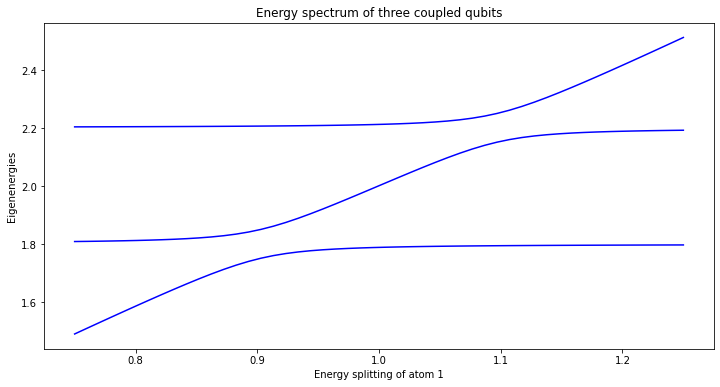

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))

for n in [1, 2, 3]:
    ax.plot(w1list / (2 * np.pi),
            (evals_mat[:, n] - evals_mat[:, 0]) / (2 * np.pi), "b")

ax.set_xlabel("Energy splitting of atom 1")
ax.set_ylabel("Eigenenergies")
ax.set_title("Energy spectrum of three coupled qubits");

## Software Versions

In [8]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman, Simon Cross and Asier Galicia.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.7.1
Numpy Version:      1.21.6
Scipy Version:      1.7.3
Cython Version:     0.29.33
Matplotlib Version: 3.2.2
Python Version:     3.8.10
Number of CPUs:     2
BLAS Info:          OPENBLAS
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Linux (x86_64)
Installation path:  /usr/local/lib/python3.8/dist-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qut